In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/colab2/'
file_name=root_path+'spam_ham_dataset.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv(file_name)

In [ ]:
df.sample(5)

,Unnamed: 0,label,text,label_num
3081,2359,ham,"Subject: hpl nom for january 10 , 2001\r\n( se...",0
1229,3976,spam,Subject: buy hydrocodone\r\nbuy your drug of c...,1
694,4043,spam,Subject: cruise 3 nts mexico only $ 197 ! - - ...,1
4061,1278,ham,Subject: eastrans nomination - 7 / 29 and foll...,0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0


In [ ]:
df.shape

(5171, 4)

In [ ]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
# drop last 3 cols
df.drop(columns=['Unnamed: 0','label'],inplace=True)

In [ ]:
df.sample(5)

,text,label_num
1937,Subject: meter # 1591 lamay gaslift\r\ndaren -...,0
133,Subject: re : noms / actual flow for 3 / 29 / ...,0
1117,Subject: prescription medication delivered ove...,1
1540,"Subject: bosses day\r\nhey kids , why don ' t ...",0
4340,Subject: cornhusker - gas management\r\ni thou...,0


In [ ]:
# renaming the cols
df.rename(columns={'label_num':'target','text':'text'},inplace=True)
df.sample(5)

,text,target
1332,"Subject: super software deal "" windows xp prof...",1
5111,"Subject: base gas roll 2 / 2001\r\njay , louis...",0
123,Subject: hpl meter # 980417 hpl / kmid - seven...,0
4051,Subject: re : nomination for gas flow / 11 / 0...,0
773,Subject: neon for feb 28\r\nattached are the q...,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,text,target
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
# missing values
df.isnull().sum()

text      0
target    0
dtype: int64

In [ ]:
# check for duplicate values
df.duplicated().sum()

178

In [ ]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(4993, 2)

## 2.EDA

In [ ]:
df.head()

,text,target
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df['target'].value_counts()

0    3531
1    1462
Name: target, dtype: int64

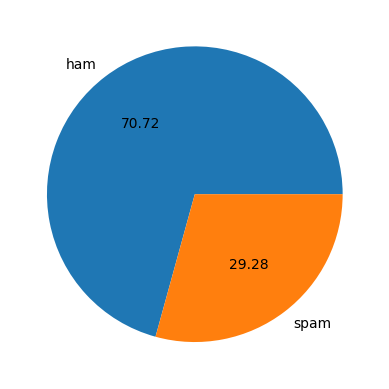

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
# Data is imbalanced

In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,text,target,num_characters
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,"Subject: photoshop , windows , office . cheap ...",1,414
4,Subject: re : indian springs\r\nthis deal is t...,0,336


In [ ]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,text,target,num_characters,num_words
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,text,target,num_characters,num_words,num_sentences
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.386942
std,1547.863387,340.702932,27.959959
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


In [ ]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,11.662419
std,1402.785831,337.018933,25.330035
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,4.000000
50%,538.000000,128.000000,7.000000
75%,1253.500000,298.500000,13.500000
max,32258.000000,8863.000000,1204.000000


In [ ]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,17.551984
std,1840.112883,349.439381,33.111447
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,4.000000
50%,589.000000,119.500000,9.000000
75%,1305.000000,252.750000,19.000000
max,22073.000000,3963.000000,693.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

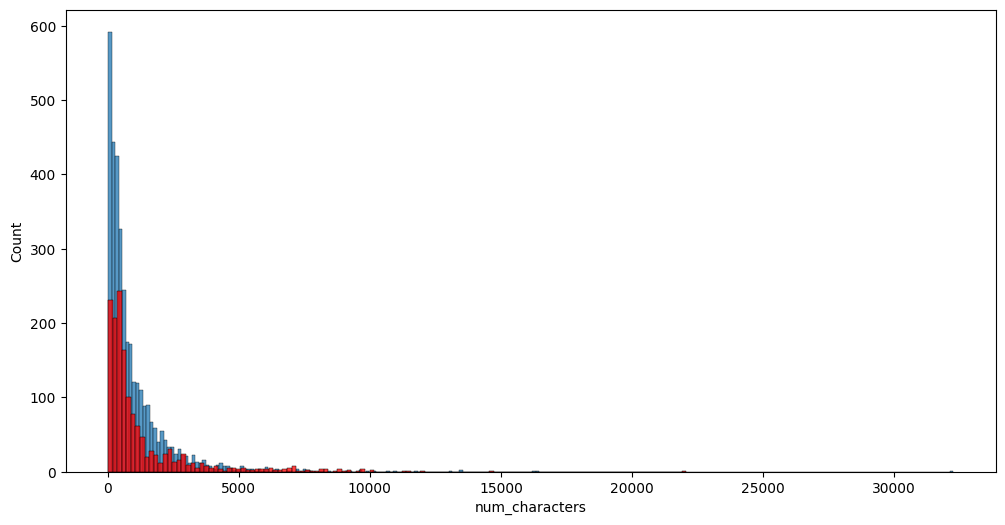

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

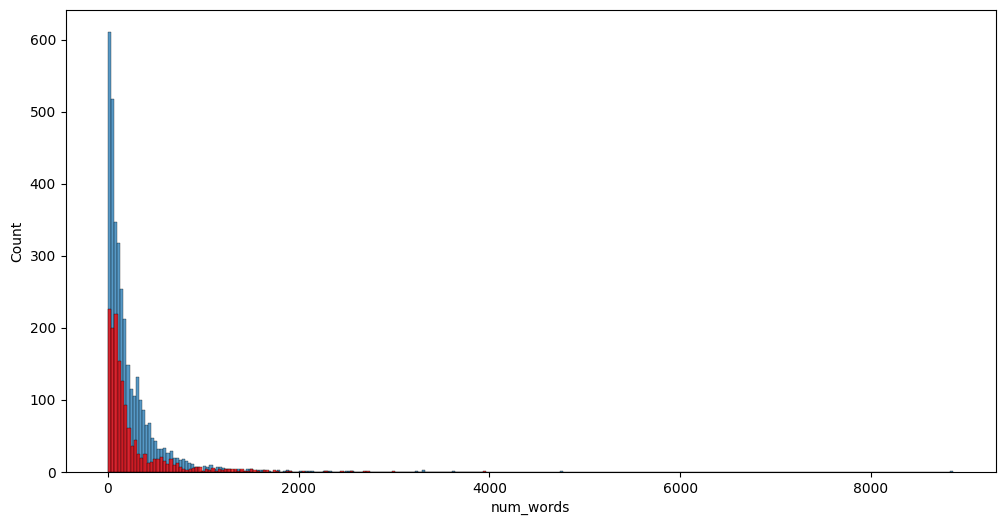

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

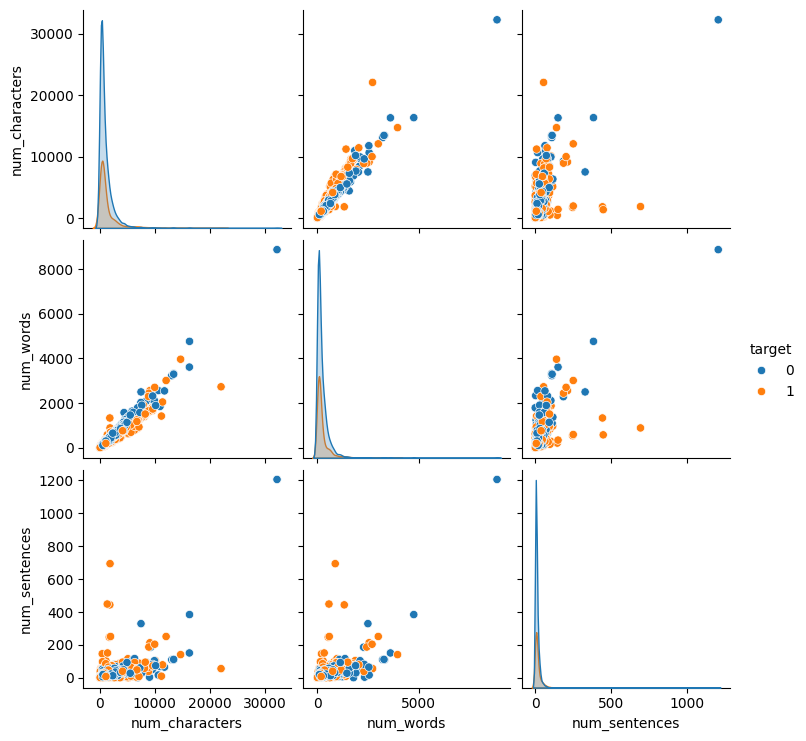

In [ ]:
sns.pairplot(df,hue='target')

<ipython-input-39-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

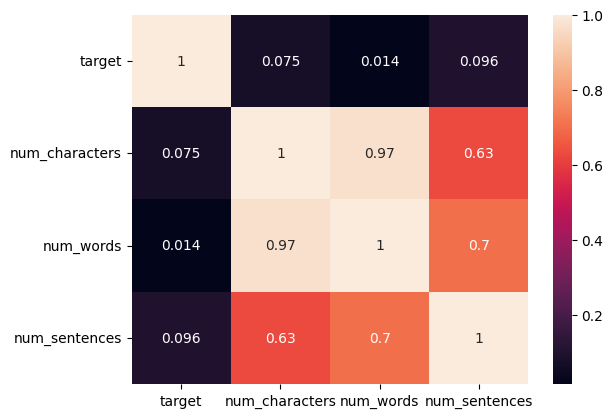

In [ ]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [ ]:
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['text'][10]

"Subject: vocable % rnd - word asceticism\r\nvcsc - brand new stock for your attention\r\nvocalscape inc - the stock symbol is : vcsc\r\nvcsc will be our top stock pick for the month of april - stock expected to\r\nbounce to 12 cents level\r\nthe stock hit its all time low and will bounce back\r\nstock is going to explode in next 5 days - watch it soar\r\nwatch the stock go crazy this and next week .\r\nbreaking news - vocalscape inc . announces agreement to resell mix network\r\nservices\r\ncurrent price : $ 0 . 025\r\nwe expect projected speculative price in next 5 days : $ 0 . 12\r\nwe expect projected speculative price in next 15 days : $ 0 . 15\r\nvocalscape networks inc . is building a company that ' s revolutionizing the\r\ntelecommunications industry with the most affordable phone systems , hardware ,\r\nonline software , and rates in canada and the us . vocalscape , a company with\r\nglobal reach , is receiving international attention for the development of voice\r\nover ip ( 

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

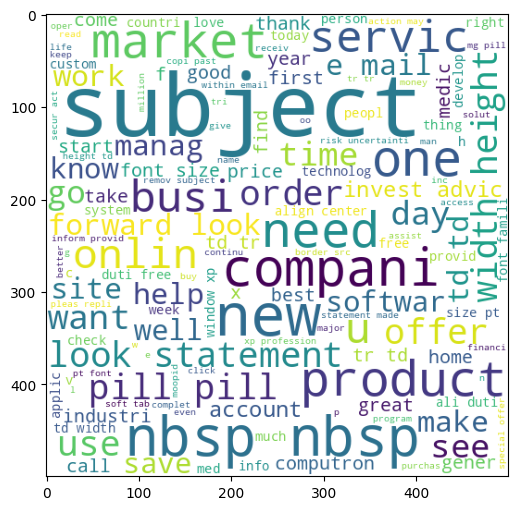

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

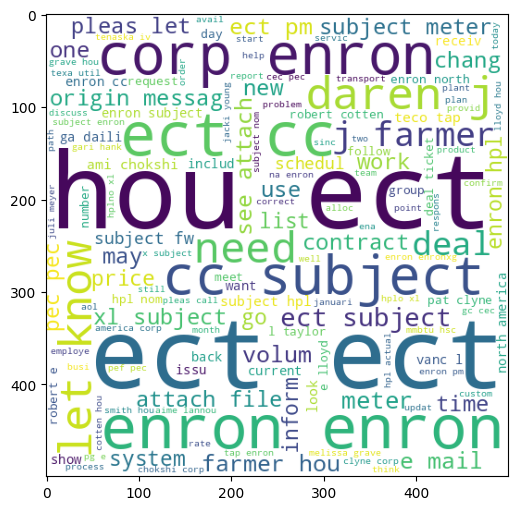

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [ ]:
len(spam_corpus)

196592

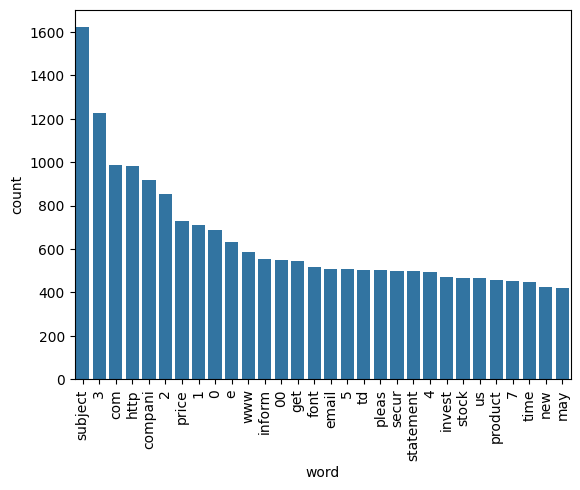

In [ ]:
from collections import Counter
data = Counter(spam_corpus).most_common(30)
df1 = pd.DataFrame(data, columns=['word', 'count'])

sns.barplot(x='word', y='count', data=df1)
plt.xticks(rotation='vertical')
plt.show()



In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

380475

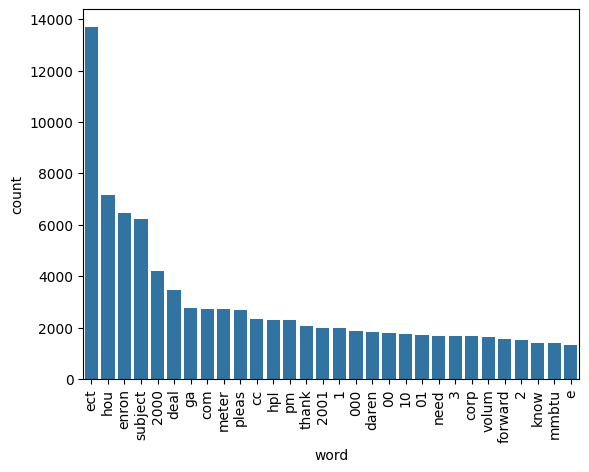

In [ ]:
from collections import Counter

data = Counter(ham_corpus).most_common(30)
df2 = pd.DataFrame(data, columns=['word', 'count'])

sns.barplot(x='word', y='count', data=df2)
plt.xticks(rotation='vertical')
plt.show()

#sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
#plt.xticks(rotation='vertical')
#plt.show()

In [ ]:
# Text Vectorization
# using Bag of Words
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


## 4. Model Building

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
!pip install simpletransformers
from simpletransformers.classification import ClassificationModel
from simpletransformers.classification import ClassificationModel, ClassificationArgs

model_args = ClassificationArgs()
model_args.num_train_epochs = 1
model_args.learning_rate = 1e-5
model_args.overwrite_output_dir = True
model_args.train_batch_size=32

model = ClassificationModel(
    "bert", 'google-bert/bert-base-uncased',args=model_args,use_cuda=True,num_labels = 2
)
X = df['transformed_text'].values
y = df['target'].values
df['text']=df['transformed_text']
df=df.drop('num_characters', axis='columns')
df=df.drop('num_words', axis='columns')
df=df.drop('transformed_text', axis='columns')
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,test_size=0.2,random_state=2)




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
number_of_eopch=8
target_names = ['ham','spam']
for i in range(0,number_of_eopch):
  print("epoch number :",i+1)
  #result_report=result_report+"epoch number :"+str(i+1)+'\n'
  model.train_model(df_train)
  test_sentances=df_test['text'].tolist()
  y_pred=model.predict(test_sentances)
  y_pred=y_pred[0]
  y_test=df_test['target'].values
  print(classification_report(y_test, y_pred, target_names=target_names))

  print("Accuracy",accuracy_score(y_test,y_pred))
  print("Precision",precision_score(y_test,y_pred))
  print("Overall Recall: ", recall_score(y_test, y_pred))
  print("Overall F1Score: ", f1_score(y_test, y_pred))


epoch number : 1


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 1:   0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

              precision    recall  f1-score   support

         ham       0.95      0.97      0.96       697
        spam       0.94      0.87      0.90       302

    accuracy                           0.94       999
   macro avg       0.94      0.92      0.93       999
weighted avg       0.94      0.94      0.94       999

Accuracy 0.9429429429429429
Precision 0.9359430604982206
epoch number : 2


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 1:   0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

              precision    recall  f1-score   support

         ham       0.96      0.99      0.97       697
        spam       0.97      0.91      0.94       302

    accuracy                           0.96       999
   macro avg       0.96      0.95      0.96       999
weighted avg       0.96      0.96      0.96       999

Accuracy 0.9629629629629629
Precision 0.9681978798586572
epoch number : 3


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 1:   0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

              precision    recall  f1-score   support

         ham       0.97      0.99      0.98       697
        spam       0.97      0.93      0.95       302

    accuracy                           0.97       999
   macro avg       0.97      0.96      0.97       999
weighted avg       0.97      0.97      0.97       999

Accuracy 0.9719719719719719
Precision 0.9724137931034482
epoch number : 4


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 1:   0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       697
        spam       0.99      0.94      0.96       302

    accuracy                           0.98       999
   macro avg       0.98      0.97      0.97       999
weighted avg       0.98      0.98      0.98       999

Accuracy 0.977977977977978
Precision 0.9895104895104895
epoch number : 5


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 1:   0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       697
        spam       0.99      0.92      0.95       302

    accuracy                           0.97       999
   macro avg       0.98      0.96      0.97       999
weighted avg       0.97      0.97      0.97       999

Accuracy 0.972972972972973
Precision 0.992831541218638
epoch number : 6


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 1:   0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       697
        spam       1.00      0.92      0.96       302

    accuracy                           0.98       999
   macro avg       0.98      0.96      0.97       999
weighted avg       0.98      0.98      0.98       999

Accuracy 0.9769769769769769
Precision 1.0
epoch number : 7


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 1:   0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       697
        spam       0.98      0.95      0.96       302

    accuracy                           0.98       999
   macro avg       0.98      0.97      0.97       999
weighted avg       0.98      0.98      0.98       999

Accuracy 0.977977977977978
Precision 0.9794520547945206
epoch number : 8


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 1:   0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       697
        spam       0.99      0.95      0.97       302

    accuracy                           0.98       999
   macro avg       0.98      0.97      0.98       999
weighted avg       0.98      0.98      0.98       999

Accuracy 0.980980980980981
Precision 0.9862542955326461
